In [1]:
import numpy as np

In [4]:
import re

In [48]:
def to_vector(s):
    print(s)
    return re.match(r".*=(.+),.*=(.+),.*=(.?\d+).*", s).groups()

In [181]:
def read_locations():
    s = """<x=8, y=0, z=8>
<x=0, y=-5, z=-10>
<x=16, y=10, z=-5>
<x=19, y=-10, z=-7>"""
#     s = """<x=-1, y=0, z=2>
# <x=2, y=-10, z=-7>
# <x=4, y=-8, z=8>
# <x=3, y=5, z=-1>"""
    s = s.split("\n")
    retval = []
    l = [to_vector(x) for x in s]
    for row in l:
        retval.append([int(x) for x in row])
    return retval

In [182]:
def apply_gravity(i,j, locations, velocities):
    moon_a = locations[i]
    moon_b = locations[j]
    for direction in range(3):
        ax = moon_a[direction]
        bx = moon_b[direction]
        if ax == bx:
            continue
        if ax > bx:
            velocities[i][direction] -= 1
            velocities[j][direction] += 1
            continue
        if ax < bx:
            velocities[i][direction] += 1
            velocities[j][direction] -= 1
            continue

In [183]:
def update_coords(i, locations, velocities):
    moon = locations[i]
    for direction in range(3):
        moon[direction] += velocities[i][direction]
        
    locations[i] = moon

In [184]:
def run_step(locations, velocities):
    for i, moon in enumerate(locations):
        for j, moon in enumerate(locations):
            if i >= j:
                continue
            apply_gravity(i,j,locations, velocities)

    for i, moon in enumerate(locations):
        update_coords(i,locations, velocities)

In [185]:
def solve1():
    locations = read_locations()
    velocities = np.zeros(shape=(len(locations),3))
    for i in range(1000):
        run_step(locations, velocities)
    locations = np.array(locations)
    return locations, velocities
        

In [200]:
def to_key(locations, velocities, axis):
    return str(locations[:,axis]) + str(velocities[:,axis])

def period_time(axis=0):
    locations = np.array(read_locations())
    velocities = np.zeros(shape=(len(locations),3))
    
    seen = set()
    num_steps = 0
    seen.add(to_key(locations, velocities, axis))
    while True:
        run_step(locations, velocities)
        num_steps += 1
        key = to_key(locations, velocities, axis)
        if key in seen:
            break
    return num_steps
            

In [213]:
def compute_gcd(x, y):
    while(y):
        x, y = y, x % y
    return x
# This function computes LCM
def compute_lcm(x, y):
    lcm = (x*y)//compute_gcd(x,y)
    return lcm

In [212]:
def solve2(n_steps):
    a1 = period_time()
    a2 = period_time(1)
    a3 = period_time(2)
    z = compute_lcm(a1,a2)
    z = compute_lcm(z, a3)
    return z

In [1]:
from aoc2019 import Computer

In [2]:
l = open('day13.in').readlines()[0]

In [3]:
l = l.split(',')

In [4]:
l = [int(x) for x in l]

In [23]:
len(l)

2160

In [24]:
c = Computer(l)

In [25]:
c.run_to_completion()

1

In [31]:
paint = {}
for i in range(0, len(c.outputs), 3):
    location = c.outputs[i], c.outputs[i+1]
    paint[location] = c.outputs[i+2]

In [32]:
total = 0
for k, v in paint.items():
    if v == 2:
        total += 1

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [41]:
def draw_board(paint):
    board = []
    for y in range(40):
        row = []
        for x in range(40):
            loc = (x, y)
            if loc not in paint:
                row.append(0)
            else:
                row.append(paint[loc])
        board.append(row)
    plt.imshow(board)

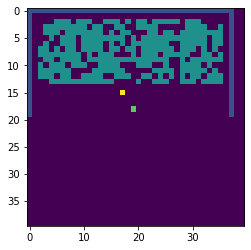

In [45]:
draw_board(paint)

In [46]:
# Part 2